In [1]:
!pip install elasticsearch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.5/905.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 1.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from elasticsearch import Elasticsearch
from elasticsearch.client import MlClient

<ipython-input-2-dec148410aec>:3: DeprecationWarning: Importing from the 'elasticsearch.client' module is deprecated. Instead use 'elasticsearch' module for importing the client.
  from elasticsearch.client import MlClient


In [3]:
import getpass
es_cloud_id = getpass.getpass("Enter Elastic Cloud ID: ")
api_id = getpass.getpass("Enter Elastic API ID: ")
api_key = getpass.getpass("Enter Elastic API KEY: ")

# Create the client instance
client = Elasticsearch(cloud_id=es_cloud_id, api_key=(api_id, api_key))
client.info()

Enter Elastic Cloud ID: ··········
Enter Elastic API ID: ··········
Enter Elastic API KEY: ··········


ObjectApiResponse({'name': 'instance-0000000001', 'cluster_name': '5089524370ab4e1396e3270ca581c541', 'cluster_uuid': 'LFC-6cmGSsqshnnawgItBg', 'version': {'number': '9.0.1', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '73f7594ea00db50aa7e941e151a5b3985f01e364', 'build_date': '2025-04-30T10:07:41.393025990Z', 'build_snapshot': False, 'lucene_version': '10.1.0', 'minimum_wire_compatibility_version': '8.18.0', 'minimum_index_compatibility_version': '8.0.0'}, 'tagline': 'You Know, for Search'})

In [4]:
es_model_id = 'intfloat__multilingual-e5-base'

In [5]:
docs = [
    {
        "text_field": "안녕하세요. 테스트 입니다."
    }
 ]

result = MlClient.infer_trained_model(client, model_id=es_model_id, docs=docs)

doc_0_vector = result['inference_results'][0]['predicted_value']
print(len(doc_0_vector))

768


In [ ]:
# information 필드에 text가 색인되면 해당 text가 임베딩되어 information_embedding필드에 저장되도록하는 파이프라인 구성

client.ingest.put_pipeline(
    id="pipeline",
    processors=[
        {
            "inference": {
                "model_id": es_model_id,
                "field_map": {"information": "text_field"},  # field to embed: information
                "target_field": "information_embedding",  # embedded field: information_embedding
            }
        }
    ],
)

ObjectApiResponse({'acknowledged': True})

In [6]:

from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
site_info = pd.read_csv('/content/drive/MyDrive/빅데이터자연어처리프로젝트/data/전국관광지정보표준데이터.csv', encoding='EUC-KR')
site_info['관광지정보'] = site_info['제공기관명'] +  " : " + site_info['관광지명'] + " : " + site_info['관광지소개']
site_info.loc[:3]

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,...,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명,관광지정보
0,아산조방원미술관,관광지,전라남도 곡성군 옥과면 미술관로 288,전라남도 곡성군 옥과면 옥과리 산1-3,35.297067,127.122404,14090.0,주차장+화장실,NaN,NaN,...,2018-06-01,150,12,"아산 조방원 화백(雅山 趙邦元 畵伯, 1922년 전남 무안출생)이 자신의 노후 작품...",061-363-7278,전라남도 곡성군청 문화체육과,2024-08-16,4860000,전라남도 곡성군,"전라남도 곡성군 : 아산조방원미술관 : 아산 조방원 화백(雅山 趙邦元 畵伯, 192..."
1,곡성생태체험관,관광지,전라남도 곡성군 옥과면 월파로 295,전라남도 곡성군 옥과면 합강리 499-1,35.317194,127.169983,314.0,주차장+화장실+운동기구,NaN,NaN,...,2002-06-01,100,15,맑고 푸른 섬진강변의 수려한 자연경관을 배경으로 한 현장 체험 위주의 전인 교육장으...,061-363-2999,전라남도 곡성군청 환경축산과,2024-08-16,4860000,전라남도 곡성군,전라남도 곡성군 : 곡성생태체험관 : 맑고 푸른 섬진강변의 수려한 자연경관을 배경으...
2,심청효문화센터,관광지,전라남도 곡성군 오산면 오산로 254-4,전라남도 곡성군 오산면 선세리 702,35.208366,127.128848,2151.0,주차장,NaN,NaN,...,2018-08-01,200,25,곡성에서는 심청의 본고장이라는 자부심으로 만행의 근본이라 일컬어지는 효(孝) 정신을...,061-363-4041,전라남도 곡성군청 문화체육과,2024-08-16,4860000,전라남도 곡성군,전라남도 곡성군 : 심청효문화센터 : 곡성에서는 심청의 본고장이라는 자부심으로 만행...
3,심청골짝나라학교,관광지,전라남도 곡성군 석곡면 방주마천목길 107,전라남도 곡성군 석곡면 방송리 590-1,35.171837,127.258012,11391.0,주차장,NaN,NaN,...,2021-09-01,140,7,전라남도교육청 대안학교 위탁교육기관인 심청골짝나라학교는 학교 부적응 학생이나 폭력 ...,061-363-4224,전라남도 곡성군청 관광과,2024-08-16,4860000,전라남도 곡성군,전라남도 곡성군 : 심청골짝나라학교 : 전라남도교육청 대안학교 위탁교육기관인 심청골...


In [18]:
# Define the mapping and settings
mapping = {
    "properties": {
        "name": {"type": "keyword"},
        "address": {"type": "text"},
        "information": {"type": "text"},
        "information_embedding.predicted_value": {
            "type": "dense_vector",
            "dims": 768,
            "index": "true",
            "similarity": "cosine",
        },
    }
}

settings = {
    "index": {
        "number_of_replicas": "1",
        "number_of_shards": "1",
        "default_pipeline": "pipeline",
    }
}

# Create the index (deleting any existing index)
client.indices.delete(index="site", ignore_unavailable=True)
client.indices.create(index="site", mappings=mapping, settings=settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'site'})

In [19]:
from elasticsearch.helpers import bulk
import math # Import math module to check for NaN

# Prepare documents for bulk indexing
actions = []
for index, row in site_info.iterrows():
    # Handle NaN values by converting them to empty strings
    address = "" if isinstance(row['소재지지번주소'], float) and math.isnan(row['소재지지번주소']) else row['소재지지번주소']
    information = "" if isinstance(row['관광지정보'], float) and math.isnan(row['관광지정보']) else row['관광지정보']

    actions.append({
        "_index": "site",  # Index name
        "_source": {
            "name": row['관광지명'],
            "address": address,
            "information": information,
            # The 'information_embedding.predicted_value' field will be populated
            # by the ingest pipeline 'pipeline' defined earlier, which uses the E5 model.
        }
    })

# Index the documents in bulk with an increased timeout
success_count, errors = bulk(client, actions, request_timeout=60)

print(f"Indexed {success_count} documents.")
if errors:
    print(f"Encountered {len(errors)} errors during indexing:")
    for error in errors:
        print(error)

<ipython-input-19-b84f79e684ac>:23: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  success_count, errors = bulk(client, actions, request_timeout=60)
<ipython-input-19-b84f79e684ac>:23: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  success_count, errors = bulk(client, actions, request_timeout=60)


Indexed 847 documents.


In [20]:
# 847개 관광지 정보 색인 완료

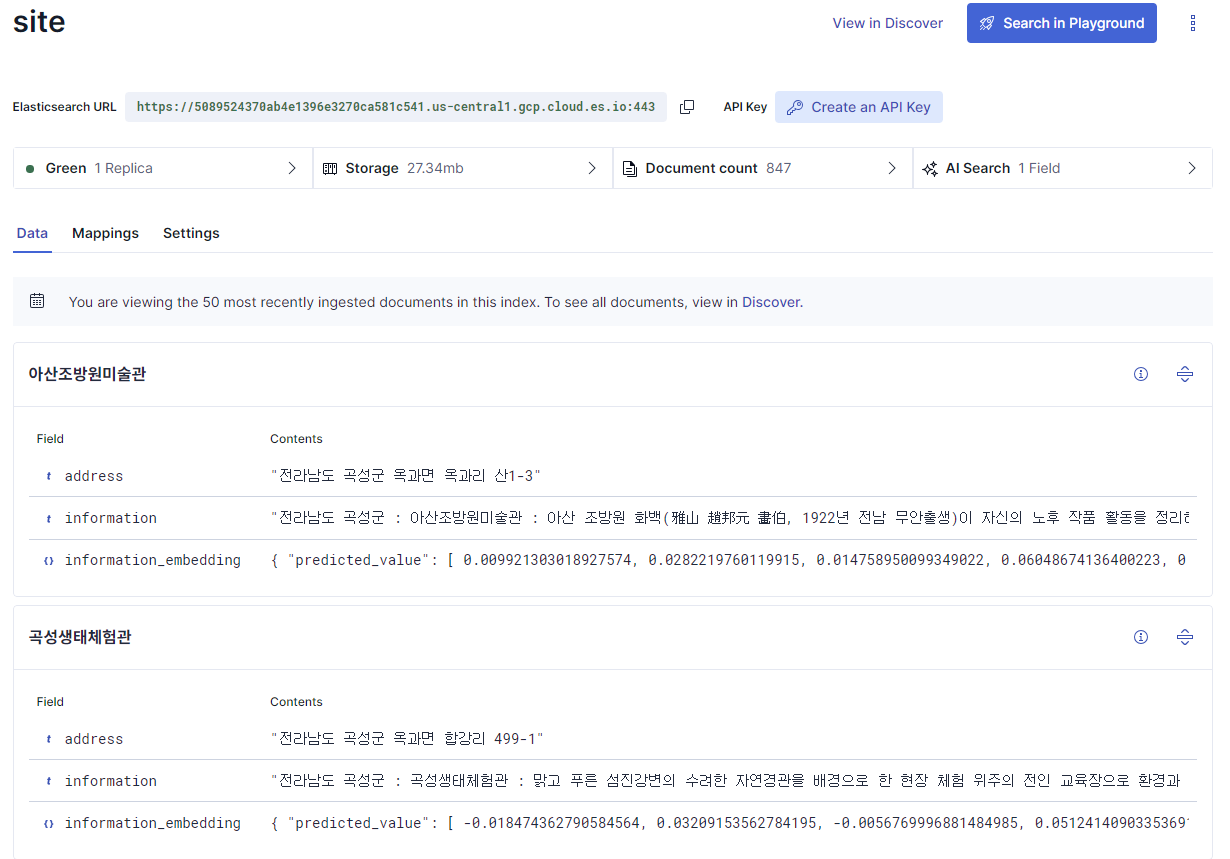